Feedback FROM PRESENTATION: Compare cluster 0 with cluster 4
give me perspective on the data
compare and contrast
"all knowing is comparative"
needs more framing for the "So What?"
draw out the types of things that you are talking about
give me the business so what

# **Exploring National Anthems: A Data Journey**

## **Introduction**

Welcome to the captivating world of national anthems! 🌍🎶 In this data science project, we embark on a musical voyage across continents, exploring the lyrical expressions that resonate with patriotism, history, and culture. Our dataset contains the stirring verses of anthems from diverse nations, each encapsulating the spirit of its people.

### **Project Goals**

Our mission is twofold:

1. **Uncover Anthem Themes**: We'll dissect the anthems, unraveling their hidden themes and sentiments. Are there common threads that bind anthems together? Do certain regions favor love, war, or freedom in their lyrical odes?


### **Tools at Our Disposal**

We'll wield three powerful tools:

1. **K-Means Clustering**: Like musical harmonies, K-Means will group anthems into clusters based on their lyrical content. Are there clusters of anthems celebrating unity, resilience, or nature?

2. **Power BI**: Our canvas for visual storytelling! Power BI dashboards will breathe life into our data, allowing us to explore trends, sentiments, and geographic patterns.

3. **Natural Language Processing (NLP)**: NLP will decode the poetic language. We'll analyze sentiments, spot historical references, and identify notable entities—whether they're legendary heroes or cherished landscapes.

## Final Briefings will start at 2:30pm on Friday. Everyone will be expected to bring their insights to the table. You may use a notebook OR PowerPoint OR PowerBI to brief
    - 10 min MAX breifing times
    - Final output should be data driven insights (think actionable!)
    - If Python and/or Machine Learning is not your jam, analyze the data YOUR way, just get me insights! 

### **Let the Anthem Symphony Begin! 🎵**

Gather your curiosity, tune your analytical instruments, and let's dive into the rich tapestry of national anthems. From the Himalayan peaks to the African savannas, every stanza carries a tale waiting to be told.

---

## Remember, data science is not just about numbers—it's about weaving narratives from raw data. So, let's harmonize data and creativity, and celebrate the anthems that echo through time! 🌟🎤

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text analytics/NLP toolkits
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer

# Unsupervised ML Models
from sklearn.cluster import KMeans


### Read CSV

In [2]:
path = "national_anthems.csv"
df = pd.read_csv(path)
print(df.shape)
df.head()

(190, 5)


,Country,Alpha-2,Alpha-3,Continent,Anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."


### Profile and Clean Data

In [3]:
# Possible null values
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    190 non-null    object
 1   Alpha-2    189 non-null    object
 2   Alpha-3    190 non-null    object
 3   Continent  190 non-null    object
 4   Anthem     190 non-null    object
dtypes: object(5)
memory usage: 7.6+ KB


In [4]:
# there are missing and duplicated data
df.describe().T

,count,unique,top,freq
Country,190,190,Albania,1
Alpha-2,189,188,CH,2
Alpha-3,190,190,ALB,1
Continent,190,6,Africa,56
Anthem,190,188,"Arise, ye who refuse to be slaves; With our ve...",2


In [5]:
# Looing for missing data
df[df['Alpha-2'].isna()]

,Country,Alpha-2,Alpha-3,Continent,Anthem
168,Namibia,NaN,NAM,Africa,Namibia land of the brave Freedom fight we he ...


In [6]:
# Replace missing NaN value with "NA" in the "Alpha-2" column
df['Alpha-2'].fillna('NA', inplace=True)


In [7]:
# check df again for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    190 non-null    object
 1   Alpha-2    190 non-null    object
 2   Alpha-3    190 non-null    object
 3   Continent  190 non-null    object
 4   Anthem     190 non-null    object
dtypes: object(5)
memory usage: 7.6+ KB


In [8]:
# looking for the duplicated data
duplicate_mask = df.duplicated(subset=['Alpha-2'], keep=False)
duplicate_rows = df[duplicate_mask]
print("Duplicate rows based on 'Alpha-2':")
duplicate_rows


Duplicate rows based on 'Alpha-2':


,Country,Alpha-2,Alpha-3,Continent,Anthem
41,Switzerland,CH,CHE,Europe,"When the morning skies grow red, and over us t..."
47,Chile,CH,CHL,South_America,"Beloved Homeland, receive the vows That Chile ..."


In [9]:
# Change the Alpha-2 value for Chile to "CL". (The correct 2 letter country code)
df.at[47, 'Alpha-2'] = "CL"


In [10]:
# Checking the value in row index 47 of the "Alpha-2" column
value_at_index_47 = df.at[47, 'Alpha-2']

# Printing the value
print("Value at index 47 in the 'Alpha-2' column:", value_at_index_47)


Value at index 47 in the 'Alpha-2' column: CL


In [11]:
# looks like there are no missing values now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    190 non-null    object
 1   Alpha-2    190 non-null    object
 2   Alpha-3    190 non-null    object
 3   Continent  190 non-null    object
 4   Anthem     190 non-null    object
dtypes: object(5)
memory usage: 7.6+ KB


In [12]:
# Looks like there are no more duplicated values except for some Anthems
df.describe().T

,count,unique,top,freq
Country,190,190,Albania,1
Alpha-2,190,190,AL,1
Alpha-3,190,190,ALB,1
Continent,190,6,Africa,56
Anthem,190,188,"Arise, ye who refuse to be slaves; With our ve...",2


In [13]:
# Some Duplicate anthems are not a mistake. For example, Cyprus and Greece share the same anthem.
# will leave these alone for now.

duplicate_mask = df.duplicated(subset=['Anthem'], keep=False)
duplicate_rows = df[duplicate_mask]
print("Duplicate rows based on 'Anthem':")
duplicate_rows

Duplicate rows based on 'Anthem':


,Country,Alpha-2,Alpha-3,Continent,Anthem
9,Cyprus,CY,CYP,Europe,"We knew thee of old, O, divinely restored, By ..."
17,Greece,GR,GRC,Europe,"We knew thee of old, O, divinely restored, By ..."
96,China,CN,CHN,Asia,"Arise, ye who refuse to be slaves; With our ve..."
109,Macau,MO,MAC,Asia,"Arise, ye who refuse to be slaves; With our ve..."


### Exploring Anthem feature

In [14]:
# add new column text_length
df['text_length'] = df['Anthem'].apply(len)
df.head(3)

,Country,Alpha-2,Alpha-3,Continent,Anthem,text_length
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...",794
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...",468
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...",613


In [15]:
# overall average length of anthem
mean_text_length = df['text_length'].mean()
print("Mean text length:", mean_text_length)

Mean text length: 748.5105263157894


In [16]:
# average anthem length grouped by continent
mean_text_length_by_continent = df.groupby('Continent')['text_length'].mean()
print("Mean text length by continent:")
print(mean_text_length_by_continent)


Mean text length by continent:
Continent
Africa            648.482143
Asia              630.909091
Europe            688.318182
North_America     899.083333
Oceania           499.500000
South_America    1773.583333
Name: text_length, dtype: float64


## Starting NLP

In [17]:
# create a series for the Anthem column
X = df['Anthem']
X

0      Around our flag we stand united, With one wish...
1      Our Fatherland, free, independent, That has fo...
2      Land of mountains, land by the river, Land of ...
3      Azerbaijan, Azerbaijan! The glorious Fatherlan...
4      We, Belarusians, are peaceful people, Wholehea...
                             ...                        
185    O defenders of the Homeland! Rally around to t...
186    Oh Uganda! May God uphold Thee, We lay our fut...
187    O sons of the Sahara! In the battlefield, you ...
188    Stand and sing of Zambia, proud and free, Land...
189    Oh lift high the banner, the flag of Zimbabwe ...
Name: Anthem, Length: 190, dtype: object

### Apply CountVectorizer

In [18]:
# apply count vectorizer with ngram range and stop words removed
vect = CountVectorizer(ngram_range=(1,2),stop_words='english', token_pattern=r'\b\w+\b' )
vect.fit(X) 
X_dtm = vect.transform(X)
X_dtm.shape

(190, 14490)

In [19]:
# Last 50 features
print(vect.get_feature_names_out()[-50:])

['zealand' 'zealand let' 'zealand men' 'zealand mountains' 'zealand peace'
 'zealous' 'zealous adore' 'zenith' 'zenith faith' 'zenith skies'
 'zimbabwe' 'zimbabwe symbol' 'zimbabwe wondrously' 'zion' 'zion hope'
 'zion jerusalem' 'ºciuszko' 'ºciuszko god' 'â' 'â d' 'â en' 'â evo'
 'â ll' 'â s' 'â ºciuszko' 'â â' 'â å' 'â œ' 'â œending' 'â šawice' 'â ž'
 'ã' 'ã â' 'ãƒâ' 'ãƒâ rpãƒâ' 'å' 'å live' 'œ' 'œ beloved' 'œ holy'
 'œ native' 'œ shall' 'œ soul' 'œ time' 'œending' 'œending love' 'šawice'
 'šawice koã' 'ž' 'ž returned']


### Apply TF-IDF

In [20]:
# Initialize TF-IDF transformer
tfidf_transformer = TfidfTransformer()

# Fit and transform the document-term matrix to TF-IDF representation
X_tfidf = tfidf_transformer.fit_transform(X_dtm)

# Display the shape of the resulting TF-IDF matrix
print(X_tfidf.shape)


(190, 14490)


## Starting Unsupervised ML

### K-means clustering

In [21]:
# Initialize KMeans with the desired number of clusters
num_clusters = 5  
kmeans = KMeans(n_clusters=num_clusters, n_init=10)

# Fit KMeans to the TF-IDF matrix
kmeans.fit(X_tfidf)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Print the cluster labels
print("Cluster labels:", cluster_labels)


Cluster labels: [1 1 2 3 0 3 1 0 4 3 1 3 0 1 4 4 4 3 1 3 1 4 2 1 2 1 2 0 1 4 3 1 1 2 1 4 3
 2 1 0 1 1 1 1 4 4 3 4 1 1 1 4 1 2 1 4 1 3 1 1 1 2 4 4 4 3 3 2 1 1 1 2 3 2
 2 3 0 3 3 0 2 2 1 2 1 4 0 0 0 1 1 0 3 0 1 2 4 3 1 3 4 1 1 4 1 4 0 2 0 4 0
 4 0 0 1 2 0 1 1 3 4 0 2 1 3 1 0 1 1 1 0 4 2 1 1 2 2 0 1 2 3 2 2 4 2 2 1 3
 0 1 0 2 2 3 2 4 3 2 1 3 1 3 0 2 2 3 1 2 0 2 4 2 0 1 1 2 0 3 1 2 1 1 3 2 3
 4 2 2 1 1]


In [22]:
# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# Analyze cluster characteristics
for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num}:")
    cluster_df = df[df['Cluster'] == cluster_num]
    
    # Print out some statistics or characteristics of each cluster
    print("Number of countries:", len(cluster_df))
    print("Countries:", cluster_df['Country'].unique())
    print("Continents:", cluster_df['Continent'].unique())
    print()


Cluster 0:
Number of countries: 28
Countries: ['Belarus' 'Bulgaria' 'Estonia' 'Moldova (the Republic of)' 'Spain'
 'Antigua and Barbuda' 'Greenland' 'Samoa' 'Kiribati'
 'Federated States of Micronesia' 'Bahrain' 'Bhutan' 'Kyrgyzstan'
 'Lebanon' 'Malaysia' 'Mongolia' 'Myanmar' 'Oman' 'Saudi Arabia'
 'Tajikistan' 'United Arab Emirates' 'Botswana' 'Equatorial Guinea'
 'Ethiopia' 'Malawi' 'Namibia' 'Rwanda' 'Seychelles']
Continents: ['Europe' 'North_America' 'Oceania' 'Asia' 'Africa']

Cluster 1:
Number of countries: 62
Countries: ['Albania' 'Armenia' 'Bosnia and Herzegovina' 'Czechia' 'Finland'
 'Hungary' 'Ireland' 'Liechtenstein' 'Luxembourg' 'Montenegro' 'Poland'
 'Portugal' 'Romania' 'Slovenia' 'Sweden' 'Switzerland' 'Ukraine'
 'United Kingdom of Great Britain and Northern Ireland (the)' 'Colombia'
 'Ecuador' 'Guyana' 'Peru' 'Uruguay' 'United States of America' 'Mexico'
 'Guatemala' 'Cuba' 'Puerto Rico' 'Jamaica' 'Trinidad and Tobago'
 'New Zealand' 'Solomon Islands' 'Tonga' 'Afghanist

In [23]:
# Get the feature names (words) from the TF-IDF matrix
feature_names = vect.get_feature_names_out()

# Get the centroid of each cluster
centroids = kmeans.cluster_centers_

# Find the top words for each cluster
for i in range(num_clusters):
    print(f"Cluster {i}:")
    # Get the indices of the top 10 words with the highest TF-IDF scores
    top_words_indices = centroids[i].argsort()[-10:][::-1]
    # Map indices to words
    top_words = [feature_names[idx] for idx in top_words_indices]
    print("Top words:", top_words)
    print()


Cluster 0:
Top words: ['live', 'country', 'people', 'happiness', 'motherland', 'flag', 'peace', 'land', 'precious', 'long']

Cluster 1:
Top words: ['land', 's', 'god', 'shall', 'oh', 'free', 'nation', 'home', 'flag', 'blood']

Cluster 2:
Top words: ['let', 'africa', 'people', 'bless', 'unity', 'new', 'sing', 'united', 'land', 'work']

Cluster 3:
Top words: ['thy', 'thee', 'hail', 'o', 'thou', 'land', 'thine', 'liberty', 'god', 'love']

Cluster 4:
Top words: ['homeland', 'glory', 'arise', 'die', 'march', 'freedom', 'let', 's', 'living', 'slaves']



Cluster 0:


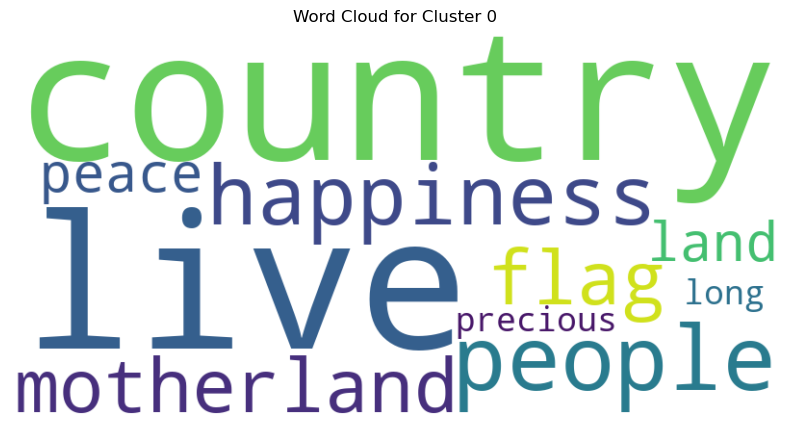

Cluster 1:


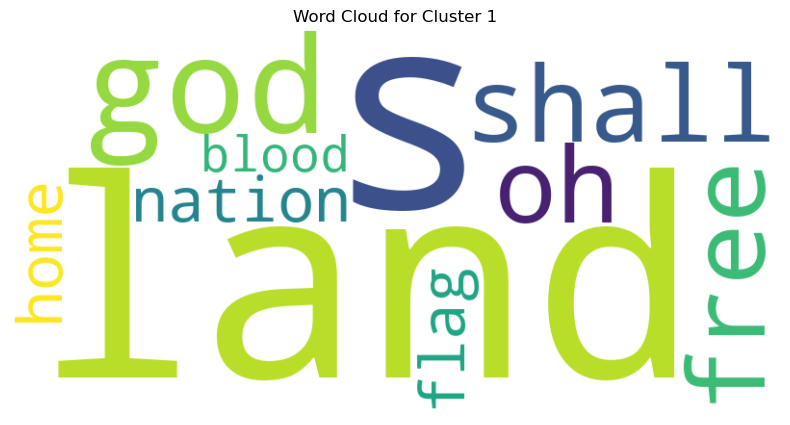

Cluster 2:


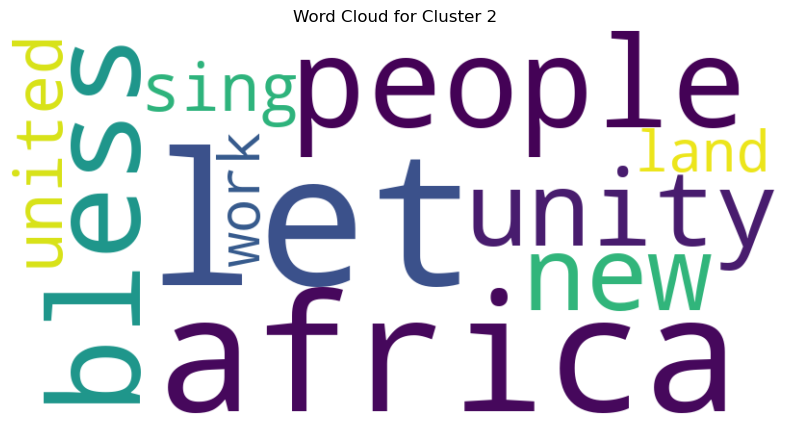

Cluster 3:


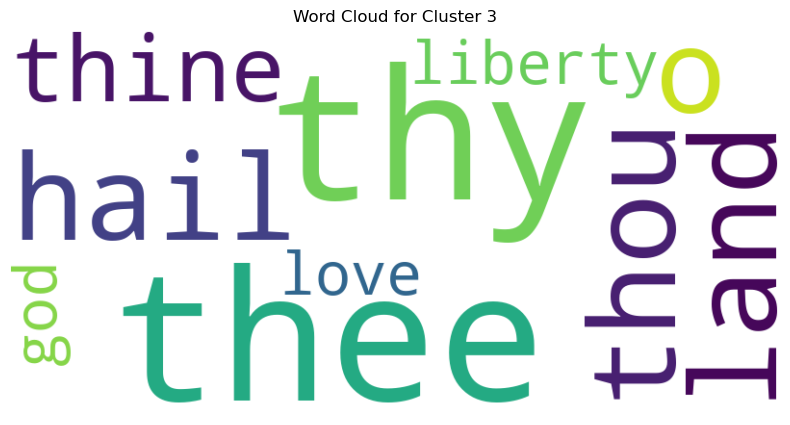

Cluster 4:


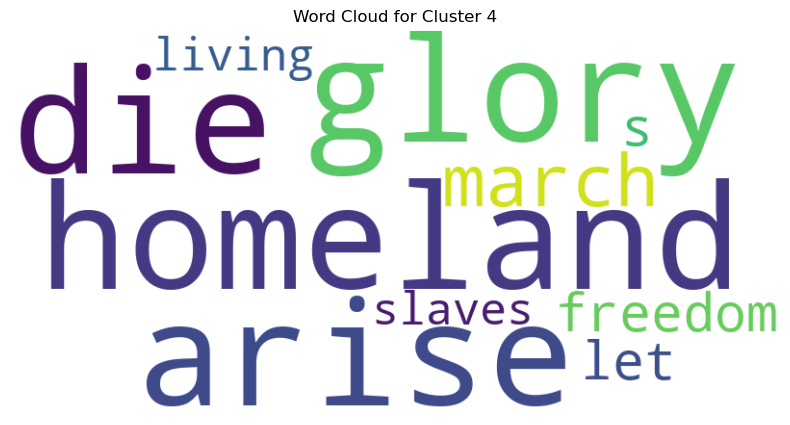

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Generate word clouds for each cluster
for i in range(num_clusters):
    print(f"Cluster {i}:")
    # Get the top words for the current cluster
    top_words_indices = centroids[i].argsort()[-10:][::-1]
    top_words = [feature_names[idx] for idx in top_words_indices]
    
    # Create a dictionary of top words with their frequencies (set all to 1 for word cloud)
    word_freq = {word: 1 for word in top_words}
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    
    # Plot word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Cluster {i}")
    plt.axis('off')
    plt.show()


# with more time, I would:
### Remove the one letter words and non-emglish words.
### Apply stemming or lemming
### Work on number of clusters.
### Group countries into more specific geographic areas.

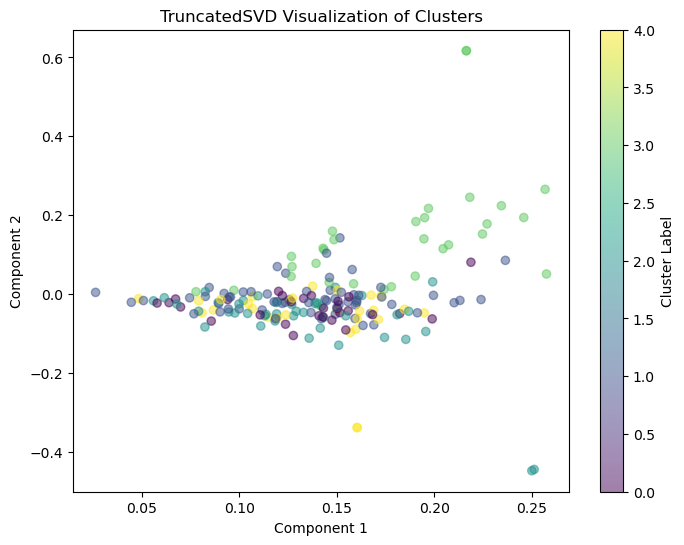

In [24]:
from sklearn.decomposition import TruncatedSVD

# Reduce the dimensionality of the TF-IDF matrix using TruncatedSVD
svd = TruncatedSVD(n_components=2)  # You can adjust the number of components as needed
X_svd = svd.fit_transform(X_tfidf)

# Create a scatter plot of the data points with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('TruncatedSVD Visualization of Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

# One-hot encode categorical features (country and continent)
encoder = OneHotEncoder(sparse=False)
country_encoded = encoder.fit_transform(df[['Country']])
continent_encoded = encoder.transform(df[['Continent']])

# Combine encoded features with TF-IDF matrix
X_combined = hstack([X_tfidf, country_encoded, continent_encoded])

# Perform clustering on the combined feature matrix
kmeans_combined = KMeans(n_clusters=num_clusters)
kmeans_combined.fit(X_combined)
cluster_labels_combined = kmeans_combined.labels_


### Stemming X_dtm

In [ ]:
from nltk.stem import PorterStemmer
import numpy as np

# Initialize Porter Stemmer
stemmer = PorterStemmer()

# Function to stem a single word
def stem_word(word):
    return stemmer.stem(word)

# Stem each term in the vocabulary while ensuring uniqueness
stemmed_vocab = set()
for word in vect.get_feature_names_out():
    stemmed_word = stem_word(word)
    stemmed_vocab.add(stemmed_word)

# Create a dictionary mapping original words to their stemmed forms
word_to_stemmed = {word: stem_word(word) for word in vect.get_feature_names_out()}

# Transform each document in the document-term matrix by replacing words with their stemmed forms
X_dtm_stemmed = np.zeros((X_dtm.shape[0], len(stemmed_vocab)))
for doc_idx, doc in enumerate(X_dtm):
    for word_idx, count in zip(doc.indices, doc.data):
        word = vect.get_feature_names_out()[word_idx]
        stemmed_word = word_to_stemmed[word]
        stemmed_word_idx = list(stemmed_vocab).index(stemmed_word)
        X_dtm_stemmed[doc_idx, stemmed_word_idx] += count

# X_dtm_stemmed now contains the stemmed document-term matrix


In [ ]:
from nltk.stem import PorterStemmer
import numpy as np

# Initialize Porter Stemmer
stemmer = PorterStemmer()

# Function to stem a single word
def stem_word(word):
    return stemmer.stem(word)

# Stem each term in the vocabulary while ensuring uniqueness
stemmed_vocab = set()
for word in vect.get_feature_names_out():
    stemmed_word = stem_word(word)
    stemmed_vocab.add(stemmed_word)

# Create a dictionary mapping original words to their stemmed forms
word_to_stemmed = {word: stem_word(word) for word in vect.get_feature_names_out()}

# Transform each document in the document-term matrix by replacing words with their stemmed forms
X_dtm_stemmed = np.zeros((X_dtm.shape[0], len(stemmed_vocab)))
for doc_idx, doc in enumerate(X_dtm):
    for word_idx, count in zip(doc.indices, doc.data):
        word = vect.get_feature_names_out()[word_idx]
        stemmed_word = word_to_stemmed[word]
        stemmed_word_idx = list(stemmed_vocab).index(stemmed_word)
        X_dtm_stemmed[doc_idx, stemmed_word_idx] += count

# X_dtm_stemmed now contains the stemmed document-term matrix


In [ ]:
# Initialize Porter Stemmer
stemmer = PorterStemmer()

# Stem each term in the vocabulary and store them in a set to ensure uniqueness
stemmed_vocab = set()
for word in vect.get_feature_names_out():
    stemmed_word = stemmer.stem(word)
    stemmed_vocab.add(stemmed_word)

# Reinitialize CountVectorizer with stemmed vocabulary
vect = CountVectorizer(vocabulary=stemmed_vocab)

# Transform the 'Anthem' column data into a stemmed document-term matrix
X_dtm_stemmed = vect.transform(X_dtm)

# X_dtm_stemmed now contains the stemmed document-term matrix

In [ ]:
X_dtm_stemmed.shape

In [ ]:
# Last 50 features
print(vect.get_feature_names_out()[-50:])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

# Initialize CountVectorizer with specified parameters
vect = CountVectorizer(ngram_range=(1, 2), stop_words='english')

# Fit CountVectorizer to the 'Anthem' column data
vect.fit(X)

# Transform the 'Anthem' column data into a document-term matrix
X_dtm = vect.transform(X)

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize each term in the vocabulary
lemmatized_vocab = set()
for word in vect.get_feature_names_out():
    lemma = lemmatizer.lemmatize(word)
    lemmatized_vocab.add(lemma)

# Reinitialize CountVectorizer with lemmatized vocabulary
vect = CountVectorizer(ngram_range=(1, 2), stop_words='english', vocabulary=lemmatized_vocab)

# Transform the 'Anthem' column data into a lemmatized document-term matrix
X_dtm_lemmatized = vect.transform(X)

# X_dtm_lemmatized now contains the lemmatized document-term matrix


In [ ]:
X_dtm_lemmatized.shape

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

# Initialize CountVectorizer with specified parameters
vect = CountVectorizer(ngram_range=(1, 2), stop_words='english')

# Fit CountVectorizer to the 'Anthem' column data
vect.fit(X)

# Transform the 'Anthem' column data into a document-term matrix
X_dtm = vect.transform(X)

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize each term in the vocabulary
lemmatized_vocab = [lemmatizer.lemmatize(word) for word in vect.get_feature_names_out()]

# Reinitialize CountVectorizer with lemmatized vocabulary
vect = CountVectorizer(ngram_range=(1, 2), stop_words='english', vocabulary=lemmatized_vocab)

# Transform the 'Anthem' column data into a lemmatized document-term matrix
X_dtm_lemmatized = vect.transform(X)

# X_dtm_lemmatized now contains the lemmatized document-term matrix


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

# Initialize CountVectorizer with specified parameters
vect = CountVectorizer(ngram_range=(1, 2), stop_words='english')

# Fit CountVectorizer to the 'Anthem' column data
vect.fit(X)

# Transform the 'Anthem' column data into a document-term matrix
X_dtm = vect.transform(X)

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize each term in the vocabulary
lemmatized_vocab = [lemmatizer.lemmatize(word) for word in vect.get_feature_names()]

# Reinitialize CountVectorizer with lemmatized vocabulary
vect = CountVectorizer(ngram_range=(1, 2), stop_words='english', vocabulary=lemmatized_vocab)

# Transform the 'Anthem' column data into a lemmatized document-term matrix
X_dtm_lemmatized = vect.transform(X)

# X_dtm_lemmatized now contains the lemmatized document-term matrix


In [ ]:
from nltk.stem import WordNetLemmatizer

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a single token
def lemmatize_token(token):
    return lemmatizer.lemmatize(token)

# Function to lemmatize a document (row in X_dtm)
def lemmatize_document(document):
    return " ".join([lemmatize_token(token) for token in document.split()])

# Lemmatize each document in X_dtm
X_dtm_lemmatized = []
for i in range(X_dtm.shape[0]):
    X_dtm_lemmatized.append(lemmatize_document(X_dtm[i]))

# Print the lemmatized X_dtm
print(X_dtm_lemmatized)


In [ ]:
from nltk.stem import WordNetLemmatizer

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a single token
def lemmatize_token(token):
    return lemmatizer.lemmatize(token)

# Function to lemmatize a document (row in X_dtm)
def lemmatize_document(document):
    return [lemmatize_token(token) for token in document.split()]

# Lemmatize each document in X_dtm
X_dtm_lemmatized = [" ".join(lemmatize_document(document)) for document in X]

# Print the lemmatized X_dtm
print(X_dtm_lemmatized)


In [ ]:
X_dtm_lemmatized


In [ ]:
from textblob import TextBlob

# Define a function to lemmatize the tokens in each document
def lemmatize_tokens(tokens):
    return [TextBlob(token).words.lemmatize() for token in tokens]

# Convert each row of the csr_matrix to a list of tokens and lemmatize them
X_lemmatized = []
for i in range(X_dtm.shape[0]):  # Iterate over each row
    tokens_indices = X_dtm[i].nonzero()[1]  # Get the indices of non-zero elements in the row
    tokens = [vect.get_feature_names_out()[index] for index in tokens_indices]  # Convert indices to words
    lemmatized_doc = lemmatize_tokens(tokens)
    X_lemmatized.append(lemmatized_doc)


In [ ]:
X_lemmatized

In [ ]:
X_lemmatized

In [ ]:
# Define a function that accepts text and returns a list of lemmas

def split_into_lemmas(text):        
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [ ]:
# Apply your custom lemma function to lemmatize the text data in X_dtm
X_dtm_lemma = X_dtm.applymap(split_into_lemmas)

# Check the shape
print(X_dtm_lemma.shape)


In [ ]:
# Use CountVectorizer to create document-term matrix
count_vect = CountVectorizer(analyzer=split_into_lemmas) 

count_vect.fit(X_dtm)  # learn the vocabulary dictionary

# Vectorize the data; transform to document-term matrix based on the vocabulary learned during the fitting
X_dtm_lemma = count_vect.transform(X_dtm)

# check the shape
print(X_dtm_lemma.shape)

In [ ]:
# All 100 features
print(count_vect.get_feature_names_out())

# count vect, lemmas, tf-idf

# After NLP: DF Anthem col will only have the important words so then I can apply clustering.

In [ ]:
# Assume every word is a noun
noun_lemmas = [word.lemmatize() for word in review.words]  # review is a TextBlob
print(f'Number of noun lemmas: {len(noun_lemmas)}\n')
print(f'review.words:\n{review.words}\n')
print(f'Unique number of noun lemmas: {len(set(noun_lemmas))}\n')
print(f'Unique noun lemmas:\n{set(noun_lemmas)}')

# notice how the lemmas have more sentiment/meaning 
# these words have the most value for what you are doing currently
# when speed is more important or you dont have a lot of comptuer power, you should use stemming over lemming

In [ ]:
# Show vectorizer attributes
list(count_vect.vocabulary_.items())[-10:]

In [ ]:
# Last 50 features
print(count_vect.get_feature_names_out()[-50:])

In [ ]:
# Print the first anthem
print(df.Anthem[0])

In [ ]:
# Save it as a TextBlob object
review = TextBlob(df.Anthem[0])

In [ ]:
# List the words
review.words

In [ ]:
len(review.words)

In [ ]:
# List the sentences
review.sentences

In [ ]:
# some string methods are available
review.lower()

In [ ]:
review.noun_phrases

In [ ]:
# lemmatization
# Assume every word is a noun
noun_lemmas = [word.lemmatize() for word in review.words]  # review is a TextBlob
print(f'Number of noun lemmas: {len(noun_lemmas)}\n')
print(f'review.words:\n{review.words}\n')
print(f'Unique number of noun lemmas: {len(set(noun_lemmas))}\n')
print(f'Unique noun lemmas:\n{set(noun_lemmas)}')

In [ ]:
vect = CountVectorizer()


In [ ]:
vect

In [ ]:
# Last 50 features
print(vect.get_feature_names_out()[-50:])